In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)
puntos = np.random.rand(300, 2) * 4 - 2

In [3]:
puntos[:100, ] += [2,2]
puntos[100:200, ] += [-1,2]
puntos[200:300, ] += [-1,5]

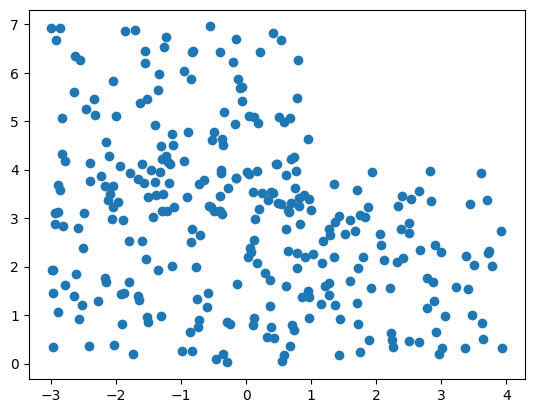

In [4]:
plt.scatter(puntos[:, 0], puntos[:, 1])

In [5]:
n_clusters = 5
clusters_indx = np.arange(puntos.shape[0])
np.random.shuffle(clusters_indx)
clusters_indx[:n_clusters]

array([105, 270,  95, 266,  63])

In [6]:
clusters = puntos[clusters_indx[:n_clusters]]
clusters

array([[ 0.16919721,  2.07486636],
       [-2.00994739,  5.09946489],
       [ 0.82438291,  2.87103025],
       [-0.53597409,  3.23575791],
       [ 1.03016826,  2.25743617]])

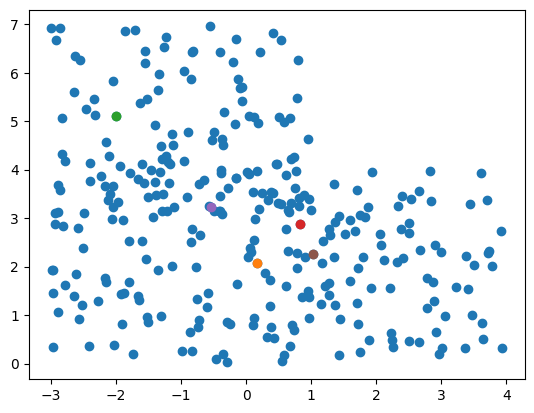

In [7]:
plt.scatter(puntos[:, 0], puntos[:, 1])
for indx in np.arange(n_clusters):
  plt.scatter(clusters[indx, 0], clusters[indx, 1])

In [8]:
def distancia(x1, x2):
  diff = x1 - x2
  return np.sqrt(np.sum(diff**2))

In [9]:
distancia(puntos[0], puntos[1])

2.157253161250402

In [10]:
for iter in range(10):
  asignaciones = np.zeros((puntos.shape[0]))

  indice = 0
  for p in puntos:
    asignado = -1
    mejor_distancia = -1
    for c in np.arange(  n_clusters):
      if asignado == -1:
        mejor_distancia = distancia( clusters[c], p)
        asignado = c
      else:
        d = distancia( clusters[c], p)
        if d < mejor_distancia:
            mejor_distancia = d
            asignado = c

    asignaciones[indice] = asignado
    indice += 1

  clusters = np.zeros( (n_clusters, puntos.shape[1] ) )
  for indx in np.arange(puntos.shape[0]):
    clusters[ int(asignaciones[indx]) ] += puntos[indx]  / (asignaciones==asignaciones[indx]).sum()


In [11]:
centroides = np.zeros( (n_clusters, puntos.shape[1] ) )
for indx in np.arange(puntos.shape[0]):
  centroides[ int(asignaciones[indx]) ] += puntos[indx]  / (asignaciones==asignaciones[indx]).sum()

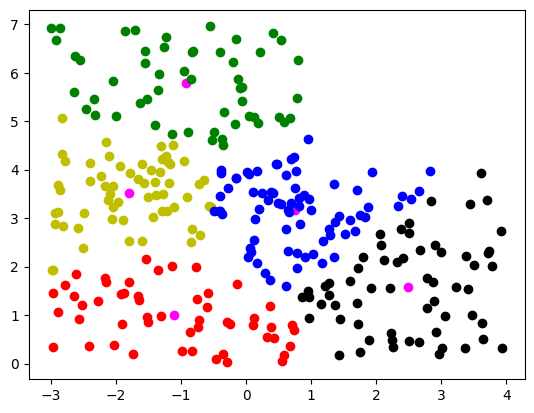

In [15]:
colores = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'y',
    4: 'k',
    5: 'm'
}

plt.scatter(centroides[:, 0], centroides[:, 1], c="#ff00ff")

for indx in np.arange(puntos.shape[0]):
  color = colores[asignaciones[indx]]
  plt.scatter(puntos[indx, 0], puntos[indx, 1], color=color)